# Houses Kaggle Competition (revisited with Deep Learning 🔥) 

[<img src='https://wagon-public-datasets.s3.amazonaws.com/data-science-images/ML/kaggle-batch-challenge.png' width=600>](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

⚙️ Let's re-use our previous **pipeline** built in the module **`05-07-Ensemble-Methods`** and try to improve our final predictions with a Neural Network!

## (0) Libraries and imports

In [1]:
%load_ext autoreload
%autoreload 2

# DATA MANIPULATION
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# DATA VISUALISATION
import matplotlib.pyplot as plt
import seaborn as sns

# VIEWING OPTIONS IN THE NOTEBOOK
from sklearn import set_config; set_config(display='diagram')

## (1) 🚀 Getting Started

### (1.1) Load the datasets

💾 Let's load our **training dataset**

In [2]:
data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/houses_train_raw.csv")
X = data.drop(columns='SalePrice')
y = data['SalePrice']

In [3]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [17]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [4]:
X.shape, y.shape

((1460, 80), (1460,))

💾 Let's also load the **test set**

❗️ Remember ❗️ You have access to `X_test` but only Kaggle has `y_test`

In [5]:
X_test = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/houses_test_raw.csv")

In [6]:
X_test.shape

(1459, 80)

### (1.2) Train/Val Split

❓ **Holdout** ❓ 

As you are not allowed to use the test set (and you don't have access to `y_test` anyway), split your dataset into a training set and a validation set.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

### (1.3) Import the preprocessor

🎁 You will find in `utils/preprocessor.py` the **`data-preprocessing pipeline`** that was built in our previous iteration.

❓ Run the cell below, and make sure you understand what the pipeline does. Look at the code in `preprocessor.py` ❓

In [9]:
from utils.preprocessor import create_preproc

preproc = create_preproc(X_train)
preproc

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical_encoder',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['1stFlrSF', '2ndFlrSF',
                                                   '3SsnPorch', 'BedroomAbvGr',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'BsmtUnfSF',
                                                   'EnclosedPorch',
                                                   'Fireplaces', 'FullBath',
                                                   'GarageArea', 'GarageCars...
                                                   'CentralAir', 'Condition1',
                                                   'Condition2', 'Exterior1st',
                                                   'Exterior2nd', 'Foundation',
                                                   'GarageType', 'Heating',
                                                   'HouseStyle', 'LotConfig',
                                                   'MSZoning', 'MasVnrType',
                                                   'MiscFeature',
                                                   'Neighborhood', 'RoofMatl',
                                                   'RoofStyle', 'SaleCondition',
                                                   'SaleType', 'Street',
                                                   'Utilities'])])),
                ('selectpercentile',
                 SelectPercentile(percentile=75,
                                  score_func=<function mutual_info_regression at 0x7f9e02c94700>))])

❓ **Scaling your numerical features and encoding the categorical features** ❓

Apply these transformations to _both_ your training set and your validation set.

In [12]:
preproc.fit(X_train, y=y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical_encoder',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['1stFlrSF', '2ndFlrSF',
                                                   '3SsnPorch', 'BedroomAbvGr',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'BsmtUnfSF',
                                                   'EnclosedPorch',
                                                   'Fireplaces', 'FullBath',
                                                   'GarageArea', 'GarageCars...
                                                   'CentralAir', 'Condition1',
                                                   'Condition2', 'Exterior1st',
                                                   'Exterior2nd', 'Foundation',
                                                   'GarageType', 'Heating',
                                                   'HouseStyle', 'LotConfig',
                                                   'MSZoning', 'MasVnrType',
                                                   'MiscFeature',
                                                   'Neighborhood', 'RoofMatl',
                                                   'RoofStyle', 'SaleCondition',
                                                   'SaleType', 'Street',
                                                   'Utilities'])])),
                ('selectpercentile',
                 SelectPercentile(percentile=75,
                                  score_func=<function mutual_info_regression at 0x7f9e02c94700>))])

In [13]:
X_train_postproc = preproc.transform(X_train)

In [14]:
X_val_postproc = preproc.transform(X_val)

## (2) 🔮 Your predictions in Tensorflow/Keras

🚀 This is your first **regression** task with Keras! 

💡 Here a few tips to get started:
- Kaggle's [rule](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation) requires to minimize **`rmsle`** (Root Mean Square Log Error). 
    - As you can see, we can specify `msle` directly as a loss-function with Tensorflow.Keras!
    - Just remember to take the square-root of your loss results to read your rmsle metric.
    
    
😃 The best boosted-tree ***rmsle*** score to beat is around ***0.13***

---

<img src="https://i.pinimg.com/564x/4c/fe/ef/4cfeef34af09973211f584e8307b433c.jpg" alt="`Impossible mission" style="height: 300px; width:500px;"/>

---


❓ **Your mission, should you choose to accept it:** ❓
- 💪 Beat the best boosted-tree 💪 

    - Your responsibilities are:
        - to build the ***best neural network architecture*** possible,
        - and to control the number of epochs to ***avoid overfitting***.

### (2.1) Predicting the houses' prices using a Neural Network

❓ **Preliminary Question: Initializing a Neural Network** ❓

Create a function `initialize_model` which initializes a Dense Neural network:
- You are responsible for designing the architecture (number of layers, number of neurons)
- The function should also compile the model with the following parameters:
    - ***optimizer = "adam"***
    - ***loss = "msle"*** (_Optimizing directly for the Squared Log Error!_)
        

In [16]:
import numpy as np

In [15]:
from tensorflow.keras import models
from tensorflow.keras import layers

2023-05-29 13:54:59.713819: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-29 13:54:59.989886: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-29 13:55:00.006295: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-29 13:55:00.006309: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not ha

In [23]:
X_train_postproc.shape

(1022, 159)

In [99]:
def initalize_model():
    model = models.Sequential()
    model.add(layers.Dense(80, activation='relu', input_dim=159))
    model.add(layers.Dense(40, activation='relu'))
    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    
    model.compile(loss='msle', 
                  optimizer='adam', 
                  ) #metrics=['accuracy']
    return model


❓ **Questions/Guidance** ❓

1. Initialize a Neural Network
2. Train it
3. Evaluate its performance
4. Is the model overfitting the dataset? 

In [100]:
model = initalize_model()

In [113]:
model.fit(X_train_postproc, y_train, epochs=500, validation_split=0.2)

Epoch 1/500
26/26 [==============================] - 0s 6ms/step - loss: 0.0104 - val_loss: 0.0077
Epoch 2/500
26/26 [==============================] - 0s 4ms/step - loss: 0.0103 - val_loss: 0.0078
Epoch 3/500
26/26 [==============================] - 0s 4ms/step - loss: 0.0101 - val_loss: 0.0085
Epoch 4/500
26/26 [==============================] - 0s 4ms/step - loss: 0.0101 - val_loss: 0.0083
Epoch 5/500
26/26 [==============================] - 0s 4ms/step - loss: 0.0101 - val_loss: 0.0081
Epoch 6/500
26/26 [==============================] - 0s 4ms/step - loss: 0.0101 - val_loss: 0.0085
Epoch 7/500
26/26 [==============================] - 0s 4ms/step - loss: 0.0102 - val_loss: 0.0087
Epoch 8/500
26/26 [==============================] - 0s 4ms/step - loss: 0.0100 - val_loss: 0.0088
Epoch 9/500
26/26 [==============================] - 0s 5ms/step - loss: 0.0098 - val_loss: 0.0089
Epoch 10/500
26/26 [==============================] - 0s 5ms/step - loss: 0.0098 - val_loss: 0.0084
Epoch 11/

26/26 [==============================] - 0s 4ms/step - loss: 0.0064 - val_loss: 0.0098
Epoch 84/500
26/26 [==============================] - 0s 4ms/step - loss: 0.0064 - val_loss: 0.0101
Epoch 85/500
26/26 [==============================] - 0s 4ms/step - loss: 0.0064 - val_loss: 0.0102
Epoch 86/500
26/26 [==============================] - 0s 4ms/step - loss: 0.0063 - val_loss: 0.0107
Epoch 87/500
26/26 [==============================] - 0s 4ms/step - loss: 0.0064 - val_loss: 0.0100
Epoch 88/500
26/26 [==============================] - 0s 4ms/step - loss: 0.0062 - val_loss: 0.0099
Epoch 89/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0063 - val_loss: 0.0103
Epoch 90/500
26/26 [==============================] - 0s 4ms/step - loss: 0.0061 - val_loss: 0.0102
Epoch 91/500
26/26 [==============================] - 0s 4ms/step - loss: 0.0063 - val_loss: 0.0100
Epoch 92/500
26/26 [==============================] - 0s 4ms/step - loss: 0.0062 - val_loss: 0.0104
Epoch 93/500


26/26 [==============================] - 0s 4ms/step - loss: 0.0039 - val_loss: 0.0131
Epoch 165/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0039 - val_loss: 0.0134
Epoch 166/500
26/26 [==============================] - 0s 4ms/step - loss: 0.0039 - val_loss: 0.0136
Epoch 167/500
26/26 [==============================] - 0s 4ms/step - loss: 0.0039 - val_loss: 0.0133
Epoch 168/500
26/26 [==============================] - 0s 4ms/step - loss: 0.0038 - val_loss: 0.0132
Epoch 169/500
26/26 [==============================] - 0s 4ms/step - loss: 0.0038 - val_loss: 0.0138
Epoch 170/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0038 - val_loss: 0.0133
Epoch 171/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.0135
Epoch 172/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.0149
Epoch 173/500
26/26 [==============================] - 0s 4ms/step - loss: 0.0038 - val_loss: 0.0133
Epoc

26/26 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.0170
Epoch 246/500
26/26 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.0171
Epoch 247/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0170
Epoch 248/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0171
Epoch 249/500
26/26 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.0177
Epoch 250/500
26/26 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0174
Epoch 251/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0173
Epoch 252/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0170
Epoch 253/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0172
Epoch 254/500
26/26 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0177
Epoc

26/26 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0191
Epoch 327/500
26/26 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.0184
Epoch 328/500
26/26 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.0188
Epoch 329/500
26/26 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.0193
Epoch 330/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0193
Epoch 331/500
26/26 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.0190
Epoch 332/500
26/26 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.0187
Epoch 333/500
26/26 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.0192
Epoch 334/500
26/26 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.0190
Epoch 335/500
26/26 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.0194
Epoc

26/26 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.0207
Epoch 408/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0210
Epoch 409/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0211
Epoch 410/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0222
Epoch 411/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0224
Epoch 412/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0208
Epoch 413/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0216
Epoch 414/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0215
Epoch 415/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0220
Epoch 416/500
26/26 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.0208
Epoc

26/26 [==============================] - 0s 4ms/step - loss: 7.9832e-04 - val_loss: 0.0238
Epoch 487/500
26/26 [==============================] - 0s 3ms/step - loss: 7.7229e-04 - val_loss: 0.0237
Epoch 488/500
26/26 [==============================] - 0s 4ms/step - loss: 8.0232e-04 - val_loss: 0.0244
Epoch 489/500
26/26 [==============================] - 0s 3ms/step - loss: 7.9525e-04 - val_loss: 0.0252
Epoch 490/500
26/26 [==============================] - 0s 4ms/step - loss: 7.8558e-04 - val_loss: 0.0245
Epoch 491/500
26/26 [==============================] - 0s 4ms/step - loss: 7.8033e-04 - val_loss: 0.0239
Epoch 492/500
26/26 [==============================] - 0s 3ms/step - loss: 7.8036e-04 - val_loss: 0.0242
Epoch 493/500
26/26 [==============================] - 0s 4ms/step - loss: 7.7782e-04 - val_loss: 0.0244
Epoch 494/500
26/26 [==============================] - 0s 3ms/step - loss: 8.0191e-04 - val_loss: 0.0250
Epoch 495/500
26/26 [==============================] - 0s 4ms/step - 

In [102]:
model.evaluate(X_val_postproc, y_val)

14/14 [==============================] - 0s 1ms/step - loss: 0.0201


0.020115751773118973

🎁 We coded a `plot_history` function that you can use to detect overfitting

In [104]:
def plot_history(history):
    plt.plot(np.sqrt(history.history['loss']))
    plt.plot(np.sqrt(history.history['val_loss']))
    plt.title('Model Loss')
    plt.ylabel('RMSLE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='best')
    plt.show()

In [110]:
history = model.history

In [111]:
model.history.__dict__

{'validation_data': None,
 'model': <keras.engine.sequential.Sequential at 0x7f9cdc236ec0>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.01241625752300024,
   0.012491940520703793,
   0.01258028857409954,
   0.012352618388831615,
   0.01245009433478117,
   0.012184057384729385,
   0.01212113257497549,
   0.012116249650716782,
   0.01201483141630888,
   0.011976533569395542,
   0.011934866197407246,
   0.011886569671332836,
   0.011852151714265347,
   0.011849972419440746,
   0.011816542595624924,
   0.011759448796510696,
   0.01161197293549776,
   0.011643009260296822,
   0.011625414714217186,
   0.011536709032952785,
   0.011445900425314903,
   0.011410812847316265,
   0.01135090459138155,
   0.011305473744869232,
   0.011196215637028217,
   0.011197942309081554,
   0.011131414212286472,
   0.011075116693973541,
   0.010972659103572369,
   0.010929688811302185,
   0.011076158843934536,
   0.011022084392607212,
   0.010766220279037952,
   0.01076298

KeyError: 'val_loss'

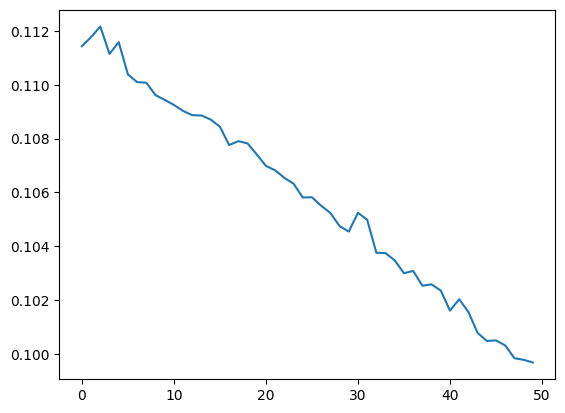

In [112]:
plot_history(history)

In [109]:
model.fit(X_train_postproc, y_train, epochs=50)

Epoch 1/50
32/32 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 2/50
32/32 [==============================] - 0s 1ms/step - loss: 0.0125
Epoch 3/50
32/32 [==============================] - 0s 1ms/step - loss: 0.0126
Epoch 4/50
32/32 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 5/50
32/32 [==============================] - 0s 1ms/step - loss: 0.0125
Epoch 6/50
32/32 [==============================] - 0s 1ms/step - loss: 0.0122
Epoch 7/50
32/32 [==============================] - 0s 1ms/step - loss: 0.0121
Epoch 8/50
32/32 [==============================] - 0s 1ms/step - loss: 0.0121
Epoch 9/50
32/32 [==============================] - 0s 1ms/step - loss: 0.0120
Epoch 10/50
32/32 [==============================] - 0s 1ms/step - loss: 0.0120
Epoch 11/50
32/32 [==============================] - 0s 1ms/step - loss: 0.0119
Epoch 12/50
32/32 [==============================] - 0s 1ms/step - loss: 0.0119
Epoch 13/50
32/32 [==============================

In [114]:
history = model.fit(X_train_postproc, 
                    y_train, 
                    validation_data = (X_val_postproc, y_val), 
                    epochs = 500, 
                    batch_size = 16,
                    verbose = 0)

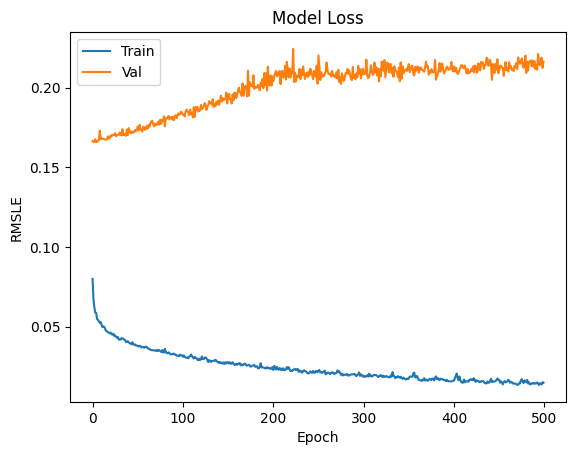

In [115]:
plot_history(history)

### (2.2) Challenging yourself

🤔 **Questions to challenge yourself:**
- Are you satisfied with your score?
- Before publishing it, ask yourself whether you could really trust it or not?
- Have you cross-validated your neural network? 
    - Feel free to cross-validate it manually with a *for loop* in Python to make sure that your results are robust against the randomness of a _train-val split_ before before submitting to Kaggle

❓ Create a function `evaluate_model` following the framework below 👇 then use a for loop with `KFold` to manually cross validate your model!

In [147]:
def evaluate_model(X, y, train_index, val_index):
    
    # Slicing the training set and the validation set
    if val_index == 0:
        X_test = X[val_index:train_index]#0:292
        X_train = X[train_index:1460]#292:1460
        y_test = y[val_index:train_index]
        y_train = y[train_index:1460]
    X_test = X[val_index:train_index]
    X_train = pd.concat([X[0:val_index-1], X[train_index+1:1460]])
    y_test = y[val_index:train_index]
    y_train = pd.concat([y[0:val_index], y[train_index:1460]])
    # Preprocessing 
    preproc.fit(X_train, y_train)
    X_train_tra = preproc.transform(X_train)
    X_test_tra = preproc.transform(X_test)
    # Training the model on the preprocessed training dataset
    model = initalize_model()
    model.fit(X_train_tra, y_train, epochs = 500, 
                    verbose = 0)
    # Evaluating the model on the preprocessed validation dataset
    model.evaluate(X_test_tra, y_test)
    
    return pd.DataFrame({
                'rmsle_final_epoch': ["rmsle"],
                'rmsle_min': ["min_rmsle"]
                        })

In [ ]:
def evaluate_model(X, y, train_index, val_index):
    
    # Slicing the training set and the validation set
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    # Preprocessing 
    preproc = create_preproc(X_train)
    preproc.fit(X_train, y_train)
    X_train_preproc = preproc.transform(X_train)
    X_val_preproc = preproc.transform(X_val)
    
    # Training the model on the preprocessed training dataset
    model = initialize_model(X_train_preproc)
    
    history = model.fit(X_train_preproc, 
                        y_train,
                        validation_data = (X_val_preproc, y_val), 
                        epochs = 200,
                        batch_size = 32,
                        verbose=0)
    
    # Evaluating the model on the preprocessed validation dataset
    
    return pd.DataFrame({
                'rmsle_final_epoch': [model.evaluate(X_val_preproc, y_val)**0.5],
                'rmsle_min': [min(history.history['val_loss'])**0.5]
                        })

In [149]:
from sklearn.model_selection import KFold

cv = 5
kf = KFold(n_splits = cv, shuffle = True)

In [ ]:
%%time

results = []

fold_number = 1

for train_index, val_index in kf.split(X):
    print("-"*100)
    print(f"FOLD NUMBER {fold_number}")    
    results.append(evaluate_model(X, y, train_index, val_index))
    fold_number +=1
    
final_results = pd.concat(results, axis = 0)
final_results.index = np.arange(0, len(results))

In [150]:
kf

KFold(n_splits=5, random_state=None, shuffle=True)

In [141]:
pd.concat([X[0:10],X[20:30]])

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,RFn,1,

In [124]:
X.shape[0]

1460

In [123]:
X.shape[0]/ 5

292.0

In [148]:
for i in range(0,1460,292):
    evaluate_model(X, y, i+292, i)

ValueError: in user code:

    File "/home/jake/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "/home/jake/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/engine/training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/jake/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/engine/training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "/home/jake/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/engine/training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "/home/jake/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/jake/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_12" is incompatible with the layer: expected shape=(None, 159), found shape=(None, 161)


In [125]:
for i in range(0,1460,292):
    print(i+292)

292
584
876
1168
1460


### (2.3) (Bonus) Using all your CPU cores to run Neural Networks

🔥 **BONUS** 🔥 **Multiprocessing computing using [dask](https://docs.dask.org/en/latest/delayed.html)** and **all your CPU cores**:

_(to mimic SkLearn's `n_jobs=-1`)_

In [ ]:
!pip install --quiet dask

In [ ]:
from sklearn.model_selection import KFold
from dask import delayed

# cv = 5
# kf = KFold(n_splits = cv, shuffle = True)
# f = delayed(evaluate_model)

# results = delayed([f(X, y, train_index, val_index) for (train_index, val_index) in kf.split(X)
#                   ]).compute(
#                       scheduler='processes', num_workers=8)

# pd.concat(results, axis=0).reset_index(drop=True)

### (2.4) (Bonus) Multiprocessing with Python


**multiprocessing with default Python library**

References :
* [Yitong Ren - Speeding Up and Perfecting Your Work Using Parallel Computing](https://towardsdatascience.com/speeding-up-and-perfecting-your-work-using-parallel-computing-8bc2f0c073f8)
* [Johaupt Github - Parallel Processing for Cross Validation - BROKEN LINK](https://johaupt.github.io/python/parallel%20processing/cross-validation/multiprocessing_cross_validation.html)

In [ ]:
# This code will fail try to debug it yourself if you cannot checkout the hints below
import multiprocessing as mp
pool = mp.Pool(processes=2) #mp.cpu_count()-1)

results = []
def log_result(x):
    results.append(x)
    
for train_index, val_index in kf.split(X):
    pool.apply_async(
        evaluate_model,
        args=(X, y, train_index, val_index),
        callback = log_result)

# Close the pool for new tasks
pool.close()

# Wait for all tasks to complete at this point
pool.join()

result = pd.concat(results, axis=0)

<details>
    <summary markdown='span'>Hints</summary>

This is a limitation of multiprocessing in ipython enviroments this code would work fine in .py file.
The key error is `AttributeError: Can't get attribute 'evaluate_model' on <module 'main' (built-in)>`

Checkout this stackoverflow for a workaround https://stackoverflow.com/questions/41385708/multiprocessing-example-giving-attributeerror !
</details>

## (3) 🏅FINAL SUBMISSION

🦄 Predict the ***prices of the houses in your test set*** and submit your results to Kaggle! 



In [ ]:
# X_test = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/houses_test_raw.csv")
# X_test_preproc = preproc.transform(X_test)
# ALREADY DONE ABOVE

In [ ]:
# YOUR CODE HERE

💾 Save your predictions in a Dataframe called `results` with the format required by Kaggle so that when you export it to a `.csv`, Kaggle can read it.

In [ ]:
# YOUR CODE HERE

📤  Export your results using Kaggle's submission format and submit it online!

_(Uncomment the last cell of this notebook)_

In [ ]:
# results.to_csv("submission_final.csv", header = True, index = False)

---

🏁 Congratulations!

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... it's time for the Recap!